In [1]:
import tensorflow as tf
print(tf.__version__)  # Verificar instalación

2.18.0


### `CARGA DE DATOS Y VISUALIZACIÓN DE IMÁGENES`

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


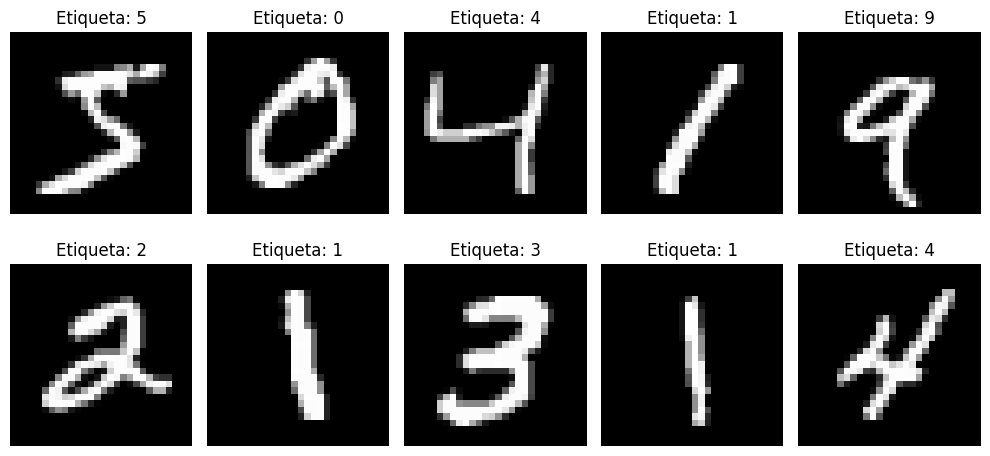

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#cargo los datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### `Implementación del modelo CNN`

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

#el preproceso
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#definición de mdelo
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#entreno el modelo
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 107ms/step - accuracy: 0.8503 - loss: 0.5358 - val_accuracy: 0.9779 - val_loss: 0.0776
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 106ms/step - accuracy: 0.9789 - loss: 0.0676 - val_accuracy: 0.9831 - val_loss: 0.0550
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.9850 - loss: 0.0467 - val_accuracy: 0.9858 - val_loss: 0.0468
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - accuracy: 0.9905 - loss: 0.0331 - val_accuracy: 0.9864 - val_loss: 0.0439
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 105ms/step - accuracy: 0.9918 - loss: 0.0259 - val_accuracy: 0.9868 - val_loss: 0.0457
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 106ms/step - accuracy: 0.9934 - loss: 0.0205 - val_accuracy: 0.9862 - val_loss: 0.0460
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.9943 - loss: 0.0173 - val_accuracy: 0.9887 - val_loss: 0.0383
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 103ms/step - accuracy: 0.9961 - loss: 0

### `EVALUACIÓN DEL RENDIMIENTO EN EL CONJUNTO DE PRUEBA`

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9884 - loss: 0.0370

Precisión en el conjunto de prueba: 0.9910


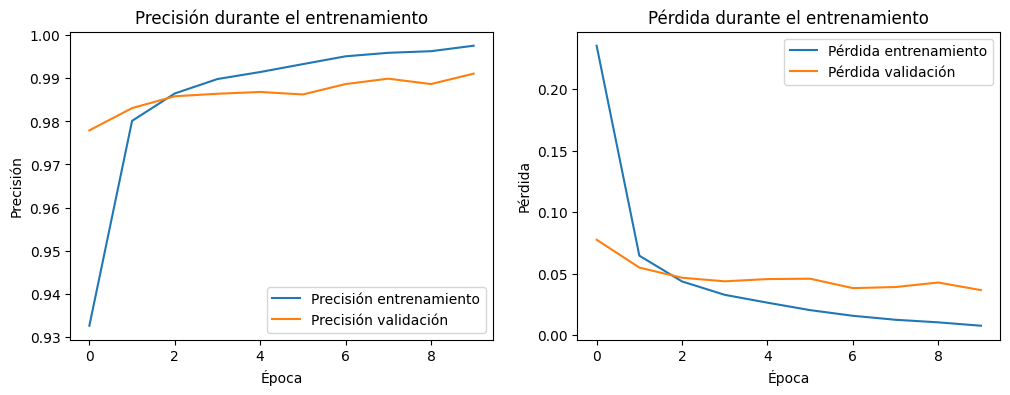

In [4]:
#testeo del modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nPrecisión en el conjunto de prueba: {test_acc:.4f}")

#gráfica de precisión y pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

### `MATRIZ DE CONFUSIÓN`

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


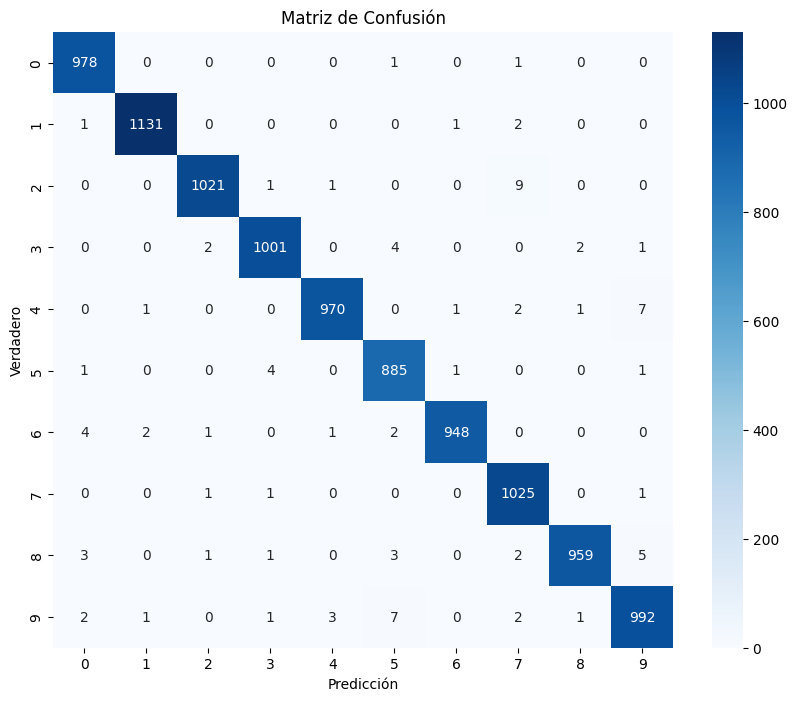

In [5]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predecir etiquetas
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Matriz de confusión
conf_mat = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

### `MODELO MODIFICADO CON MÁS CAPAS`

In [6]:
model_modified = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_modified.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_modified = model_modified.fit(X_train, y_train,
                                     epochs=10,
                                     batch_size=128,
                                     validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 109s 285ms/step - accuracy: 0.8341 - loss: 0.5272 - val_accuracy: 0.9831 - val_loss: 0.0549
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 144s 291ms/step - accuracy: 0.9846 - loss: 0.0511 - val_accuracy: 0.9858 - val_loss: 0.0477
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 137s 277ms/step - accuracy: 0.9888 - loss: 0.0344 - val_accuracy: 0.9879 - val_loss: 0.0390
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 148s 294ms/step - accuracy: 0.9920 - loss: 0.0260 - val_accuracy: 0.9900 - val_loss: 0.0325
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 139s 285ms/step - accuracy: 0.9944 - loss: 0.0164 - val_accuracy: 0.9905 - val_loss: 0.0351
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 146s 296ms/step - accuracy: 0.9950 - loss: 0.0144 - val_accuracy: 0.9886 - val_loss: 0.0388
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 151s 319ms/step - accuracy: 0.9956 - loss: 0.0126 - val_accuracy: 0.9906 - val_loss: 0.0324
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 135s 302ms/step - accuracy: 0.9967 -

### `COMPARACIÓN DE RESULTADOS`

In [ ]:
test_loss_mod, test_acc_mod = model_modified.evaluate(X_test, y_test)
print(f"\nPrecisión modelo original: {test_acc:.4f}")
print(f"Precisión modelo modificado: {test_acc_mod:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9875 - loss: 0.0389

Precisión modelo original: 0.9910
Precisión modelo modificado: 0.9902


### `CONCLUSIONES`
- La CNN implementada logra una alta precisión (>98%) en el conjunto de prueba MNIST, demostrando la efectividad de las redes convolucionales para clasificación de imágenes.
- La adición de más capas convolucionales y densas puede mejorar ligeramente el rendimiento, pero también aumenta el riesgo de sobreajuste y el tiempo de entrenamiento.
- La matriz de confusión muestra que los dígitos más confundidos son el 4 y el 9, y el 5 y el 3, lo que es esperable por su similitud visual.
- El modelo aprende efectivamente características como bordes, formas y patrones locales sin necesidad de extracción manual de características.